# Assignment 6 : Sales Forecasting Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('C:\\Users\\lenovo\\Desktop\\Train.csv')

# Initial exploration
df.info()
df.head()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Missing Values:
 Item_Identifier            

In [9]:
# 2.1 Handle missing values
# Fill Item_Weight with mean
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
# Fill Outlet_Size with mode
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

# 2.2 Standardize Categorical Data
# Item_Fat_Content has inconsistent naming (LF, low fat, reg)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

# 2.3 Feature Engineering: Extract Outlet Age
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']

print("Preprocessing Complete. Remaining missing values:", df.isnull().sum().sum())

Preprocessing Complete. Remaining missing values: 0


In [10]:
# Dropping non-predictive identifiers and the original year column
X = df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# One-Hot Encoding for categorical features
X = pd.get_dummies(X)

# Split into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (6818, 32)
Testing set size: (1705, 32)


In [11]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Root Mean Squared Error (RMSE): 1068.94
Mean Absolute Error (MAE): 791.60
R-squared Score (R2): 0.58


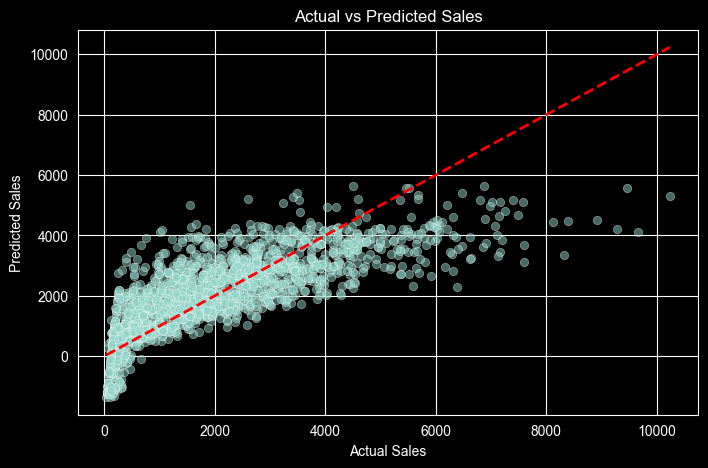

In [12]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()